# II. Programming and critical analysis

Recall the column_diagnosis.arff dataset from previous homeworks. For the following exercises,
normalize the data using sklearn’s MinMaxScaler

##### Import File

In [1]:
from scipy.io.arff import loadarff
import pandas as pd


# Reading the ARFF file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])

true_labels = df['class'].str.decode('utf-8')
df = df.drop(columns=['class'])

#print(true_labels)

In [2]:
# Normalize the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

In [3]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert the string labels to integers
true_labels_int = label_encoder.fit_transform(true_labels)

## 1)
Using sklearn, apply k-means clustering fully unsupervisedly on the normalized data with 𝑘 ∈ {2,3,4,5} (random=0 and remaining parameters as default). Assess the silhouette and purity of the produced solutions.

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import completeness_score, homogeneity_score

# Initialize a list to store silhouette and purity scores for different k values
silhouette_scores = []
purity_scores = []

# Define a range of k values
k_values = [2, 3, 4, 5]

# Perform k-means clustering for different k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(normalized_data)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(normalized_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Calculate purity
    # Assuming you have ground truth labels in a variable named 'true_labels'
    purity = homogeneity_score(true_labels_int, cluster_labels)
    purity_scores.append(purity)

# Print silhouette and purity scores for different k values
for k, silhouette, purity in zip(k_values, silhouette_scores, purity_scores):
    print(f'K={k}: \nSilhouette Score: {silhouette}\nPurity: {purity}\n\n')

/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K=2: 
Silhouette Score: 0.36044124340441114
Purity: 0.19421751845896906


K=3: 
Silhouette Score: 0.29579055730002257
Purity: 0.27137462044401917


K=4: 
Silhouette Score: 0.27442402122340176
Purity: 0.2727230243601453


K=5: 
Silhouette Score: 0.23823928397844843
Purity: 0.3372385188316694




/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## 2)
Consider the application of PCA after the data normalization:  
    i. Identify the variability explained by the top two principal components.  
    ii. For each one of these two components, sort the input variables by relevance by inspecting the absolute weights of the linear projection.

In [5]:
import numpy as np
from sklearn.decomposition import PCA

# Aplicar PCA ao conjunto de dados normalizado
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_data)

# i. Variabilidade explicada pelos dois principais componentes
explained_variance = pca.explained_variance_ratio_
variance_explained_by_top_two = np.sum(explained_variance[:2])
print(f"Variability explained by the top two principal components: {variance_explained_by_top_two:.2%}")

# ii. Obter os pesos dos componentes principais
component_1_weights = pca.components_[0]
component_2_weights = pca.components_[1]

# Obter os índices das variáveis ordenadas por relevância nos dois componentes
component_1_sorted_indices = np.argsort(np.abs(component_1_weights))[::-1]
component_2_sorted_indices = np.argsort(np.abs(component_2_weights))[::-1]

# Obter os nomes das variáveis ordenadas por relevância nos dois componentes
input_variable_names = df.columns

component_1_sorted_variable_names = [input_variable_names[i] for i in component_1_sorted_indices]
component_2_sorted_variable_names = [input_variable_names[i] for i in component_2_sorted_indices]

# Imprimir as variáveis, PC weights e PC absolute weights nos dois componentes
print("\nVariables sorted by relevance for the first principal component:")
for i, name in enumerate(component_1_sorted_variable_names):
    print(name)

print("\nVariables sorted by relevance for the second principal component:")
for i, name in enumerate(component_2_sorted_variable_names):
    print(name)


Variability explained by the top two principal components: 77.14%

Variables sorted by relevance for the first principal component:
pelvic_incidence
lumbar_lordosis_angle
pelvic_tilt
sacral_slope
degree_spondylolisthesis
pelvic_radius

Variables sorted by relevance for the second principal component:
pelvic_tilt
pelvic_radius
sacral_slope
pelvic_incidence
lumbar_lordosis_angle
degree_spondylolisthesis


## 3)
Visualize side-by-side the data using: i) the ground diagnoses, and ii) the previously learned 𝑘 = 3 clustering solution. To this end, projected the normalized data onto a 2-dimensional data space using PCA and then color observations using the reference and cluster annotations.

/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


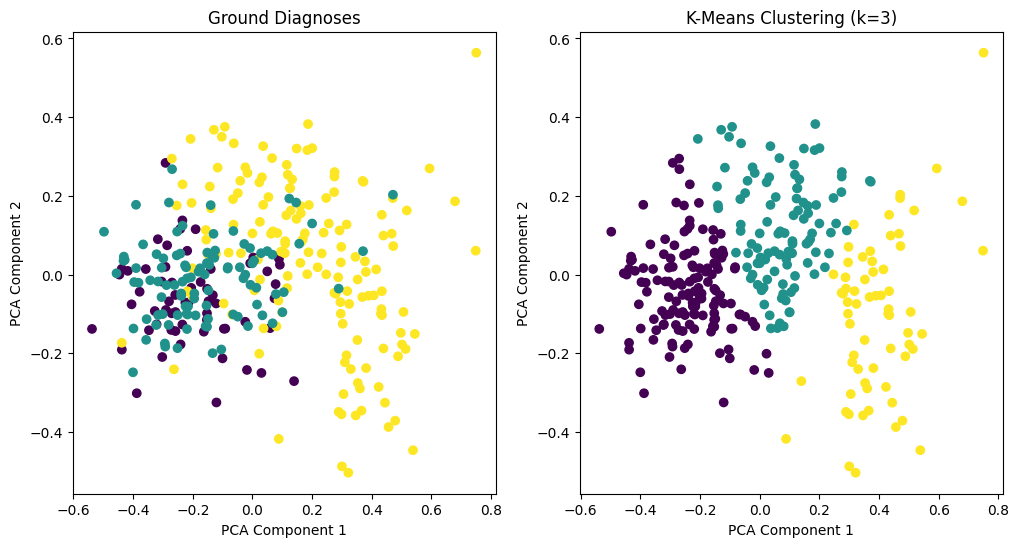

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(normalized_data)
#X_pca_labels = pca.fit_predict(normalized_data)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(normalized_data)

# Create a scatter plot for the ground diagnoses
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis', c=true_labels_int)
plt.title("Ground Diagnoses")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Create a scatter plot for the clustering solution
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering (k=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.show()

## 4)
Considering the results from questions (1) and (3), identify two ways on how clustering can
be used to characterize the population of ill and healthy individuals.